# Bayesian Learning

Implementing the Naive Bayes classifier with Scikit-Learn.

## 1. Import libraries
Importing necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

import joblib

# Pre-setting precision parameters
np.set_printoptions(precision=2)

## 2. Import datasets
Importing training, validation and test data and making normalization.
Normalization is not applicable, because it could cause negative values.

In [3]:
# Import trainig and test datasets
X_train = (pd.read_csv('data/X_train.csv',header=None,skiprows=1,index_col=0).values).tolist()
x_test = (pd.read_csv('data/x_test.csv',header=None,skiprows=1,index_col=0).values).tolist()

y_train = sum(((pd.read_csv('data/y_train.csv',header=None,skiprows=1,index_col=0).values).tolist()),[])
y_test = sum(((pd.read_csv('data/y_test.csv',header=None, skiprows=1,index_col=0).values).tolist()),[])

# Pre-defining calculateted prior probabilities of the classes (according to knowledge countries spatial distribution)
class_prior = [0.16, 0.09, 0.18, 0.27, 0.20, 0.10]

## 3. The Naive Bayes Classifiers in Scikit-Learn: Comparasion of accuracy between default GaussianNB, ComplementNB, BernoulliNB, MultinomialNB and CategoricalNB models
Testing different Naive Bayes Classifier estimators:
- GaussianNB - which is suited for features which have Gaussian distribution of likelihood.
- ComplementNB - which is suited for imbalanced classification problems.
- BernoulliNB - which is suited for  binary/boolean features (should be same as MultinomialNB in our dataset).
- MultinomialNB - which is suited for multinomially distributed data (should be same as BernoulliNB in our dataset).
- CategoricalNB - which is suited for categorical data distribution.

Testing one by one the accuracy of GaussianNB, ComplementNB, BernoulliNB, MultinomialNB and CategoricalNB models and finding the best solution in terms of errors. We are comparing default models in this step.

In [4]:
# GaussianNB: fitting default model to train data, evaluating it and printing accuracy
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
gaussian_y_pred = gaussian_nb.predict(x_test)
print('\033[1m' + 'GaussianNB model' + '\033[0m')
print(f'Accuracy score on training set: {gaussian_nb.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, gaussian_y_pred)}')

# ComplementNB: fitting default model to train data, evaluating it and printing accuracy
complement_nb = ComplementNB()
complement_nb.fit(X_train, y_train)
complement_y_pred = complement_nb.predict(x_test)
print('\033[1m' + 'ComplementNB model' + '\033[0m')
print(f'Accuracy score on training set: {complement_nb.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, complement_y_pred)}')

# BernoulliNB: fitting default model to train data, evaluating it and printing accuracy
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
bernoulli_y_pred = bernoulli_nb.predict(x_test)
print('\033[1m' + 'BernoulliNB model' + '\033[0m')
print(f'Accuracy score on training set: {bernoulli_nb.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, bernoulli_y_pred)}')

# MultinomialNB: fitting default model to train data, evaluating it and printing accuracy
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
multinomial_y_pred = multinomial_nb.predict(x_test)
print('\033[1m' + 'MultinomialNB model' + '\033[0m')
print(f'Accuracy score on training set: {multinomial_nb.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, multinomial_y_pred)}')

# CategoricalNB: fitting default model to train data, evaluating it and printing accuracy
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train, y_train)
categorical_y_pred = categorical_nb.predict(x_test)
print('\033[1m' + 'CategoricalNB model' + '\033[0m')
print(f'Accuracy score on training set: {categorical_nb.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, categorical_y_pred)}')

GaussianNB model
Accuracy score on training set: 0.3096774193548387
Accuracy score on test set: 0.15384615384615385
ComplementNB model
Accuracy score on training set: 0.5483870967741935
Accuracy score on test set: 0.41025641025641024
BernoulliNB model
Accuracy score on training set: 0.567741935483871
Accuracy score on test set: 0.4358974358974359
MultinomialNB model
Accuracy score on training set: 0.5548387096774193
Accuracy score on test set: 0.4358974358974359
CategoricalNB model
Accuracy score on training set: 0.6
Accuracy score on test set: 0.5384615384615384


Comparing the default models, we see that the best accuracy parameters belong to the CategoricalNB model. Further, CategoricalNB model will be analyzed and eveluated.

## 4. Tuning model on various Hyperparameters
Using a Grid Search on various Hyperparameters to find out best fit, which will have almost the same accuracy fot both train and test datasets.
We will use parameters as follows:
- 'alpha' parameter, which represents the adaptive smoothing of a model.
- 'fit_prior' parameter which define whether to learn class prior probabilities or not.
- 'min_categories' is not tested and will be regarded as 'None', i.e. number of categories will be calcilated automatically from the training data.

In [5]:
# Tuning Hyperparameters with the usage of Grid Search
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              'fit_prior': [True, False],
             }

estimator = CategoricalNB()
categorical_nb_grid = GridSearchCV(estimator=estimator, param_grid=param_grid, verbose=3, cv=10, n_jobs=-1)

categorical_nb_grid.fit(X_train, y_train)

print(f'Best Parameters : {categorical_nb_grid.best_params_}')

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best Parameters : {'alpha': 0.01, 'fit_prior': True}


C:\ProgramData\Anaconda3\envs\geospatial\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In our case the optimal calculated Hyperparameters shows maximum accuracy score equal to 0.625. Optinal Hyperparameters are as follows:

- 'alpha' tends to be equal to '0.01' and also tends to zero (1.0e-10).
- 'fit_prior' tends to be equal to 'True'.

## CategoricalNB Model with optinal parameters and its evaluation
Evaluating the CategoricalNB model with optimal parameters:
- Run CategoricalNB model with optimal parameters, including presefined prior probabilities of the classes (according to knowledge countries spatial distribution).
- Evaluating model and model fitting by plotting confusion matrix. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. Correctly classified values are located diagonally

In [6]:
# CategoricalNB: fitting model with optimal parameters to train data, evaluating it and printing accuracy
categorical_nb_final = CategoricalNB(alpha=1.0e-10, fit_prior=True, class_prior=class_prior, min_categories=None)
categorical_nb_final.fit(X_train, y_train)
categorical_y_final_pred = categorical_nb_final.predict(x_test)
print('\033[1m' + 'CategoricalNB model with optimal parameters' + '\033[0m')
print(f'Accuracy score on training set: {categorical_nb_final.score(X_train, y_train)}')
print(f'Accuracy score on test set: {accuracy_score(y_test, categorical_y_final_pred)}')

CategoricalNB model with optimal parameters
Accuracy score on training set: 0.6709677419354839
Accuracy score on test set: 0.5128205128205128


Text(37.32000000000001, 0.5, 'Predicted label')

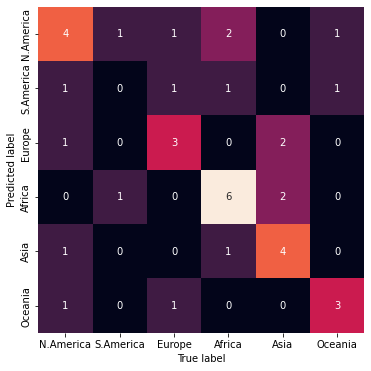

In [7]:
# Defining plotting parameters and plotting confusion matrix
matrix_categorical = confusion_matrix(y_test, categorical_y_final_pred)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrix_categorical.T, square=True, annot=True, fmt='d', cbar=False, ax=ax)
ax.yaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
ax.xaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

Evaluating classifier using its classification report and accuracy.

In [8]:
# Printing classification accuracy report
print(classification_report(y_test, categorical_y_final_pred))
# Printing accuracy value
print(f'Accuracy score on test set: {accuracy_score(y_test, categorical_y_final_pred)}')

              precision    recall  f1-score   support

           1       0.44      0.50      0.47         8
           2       0.00      0.00      0.00         2
           3       0.50      0.50      0.50         6
           4       0.67      0.60      0.63        10
           5       0.67      0.50      0.57         8
           6       0.60      0.60      0.60         5

    accuracy                           0.51        39
   macro avg       0.48      0.45      0.46        39
weighted avg       0.55      0.51      0.53        39

Accuracy score on test set: 0.5128205128205128


## 5. Defining parameters for model comparasion and exporting final model
For further model comparasion we need to define and save final accuracy value for Bayesian Learning.

In [11]:
# Defining parameters for model comparasion
bs_accuracy = accuracy_score(y_test, categorical_y_final_pred)
print(f'Bayesian Learning Model Accuracy: {bs_accuracy}')

# Exporting final model
joblib.dump(categorical_nb_final, 'saved_model/bayes.pkl')

Bayesian Learning Model Accuracy: 0.5128205128205128


['saved_model/bayes.pkl']